# PHYS 105: Computational Physics I

## In-Class Exercise 9.1

## Name: Christopher Morris

## Suborbital Motion: Air Resistance

Lets add now the effects of air resistance.  Include the
$\beta v^2$ term to the acceleration:

\begin{eqnarray}
~~~~~~a_x &=& -\frac{GM\,x}{r^3} - \beta v v_x\nonumber\\
~~~~~~a_y &=& -\frac{GM\,y}{r^3} - \beta v v_y\,.\nonumber
\end{eqnarray}

As before, include the decrease in density with altitude by taking

$$
	\beta ~=~ 10^{-5}\,e^{-(r-R)/h}\,,
$$

where $h=7$ km.

    
  **Instructions**:
    
Consider again $GM = gR^2$, and use a timestep of $\delta t = 0.1$ s. 
For $v_0$ = 1500 m/s and angle  $\theta_0 = 20^\circ$ to the horizontal:
    
  * **Plot** the trajectory of your projectile 
    until it strikes the ground, at $r$ < $R$.
  * **Determine** the
    range (*along* the surface), maximum height (in the *radial* direction), 
    and time of flight.  As usual, use linear
    interpolation (to $r$ = $R$) to refine your answer for the range and
    time of flight. 
  * **Determine** by how much does the range decrease compared to the previous 
    in-class (In-Class 9.0b).
  * **Find** the value of $v_0$ to restore the range obtained in
	the previous in-class to 1 percent accuracy.
  * By varying $\theta$, **find** the maximum possible range for this value of
	$v_0$. **How much** is this value of $\theta$ ($\theta_{max}$).

In [41]:
R = 6400000
xcircle = []
ycircle = []
temp_theta = 0
dtheta = math.pi/200
while temp_theta < math.pi/2:
    xcircle.append(R * math.cos(temp_theta))
    ycircle.append(R * math.sin(temp_theta))
    temp_theta += dtheta

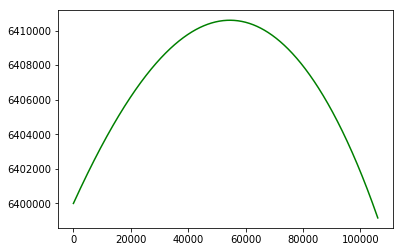

Time of flight: 94.9984284696s
Range of flight: 106139.489661m
Maximum: 10833.2497508m
Angle of Collision: 60.3753061793 degrees
This is for theta = 20


In [46]:
import sys
from math import *
import matplotlib.pyplot as plt


# Gravity, constant acceleration
g     = 9.8

# Default options:
alpha = 0.0
theta = 20 				# (degrees)
v0    = 1500 				# unit: m/s 
R = 6400000
GM = g * R**2

def acc(x, y, vx, vy, t):
    r_temp = sqrt(x**2 + y**2)
    v_abs = math.sqrt(vx**2 + vy**2)

    ax = -GM * x / r_temp**3
    ay = -GM * y / r_temp**3

    beta = 10**-5 * math.exp((-r_temp + R) / (7000))

    return ax - beta*v_abs*vx, ay - beta*v_abs*vy




def take_a_step(x, y, vx, vy, t, dt):

    ax,ay = acc(x, y, vx, vy, t)

    # Predict: 

    x += vx*dt + 0.5*ax*dt*dt
    y += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    t += dt

    # Correct: 

    ax1,ay1 = acc(x, y, vx, vy, t)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    return x,y,vx,vy,t


def interp(x0, y0, x1, y1, x):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)



# Set parameters governing the numerical details 
dt = 0.1

# Set initial position and velocity 
x0 = 0.0
y0 = R

# Determine components of the initial velocity vector 
vx0 = v0 * cos(theta * pi/180.0)
vy0 = v0 * sin(theta * pi/180.0)

# Initialize the trajectory 
t = 0
x = x0
y = y0
r = sqrt(x**2 + y**2)

vx = vx0
vy = vy0

#print x, y, t
rmax = 0.0
x_list = []
y_list = []
t_list = []

while r >= R:

    x_list.append(x)
    y_list.append(y)
    t_list.append(t)

    rprev = sqrt(x**2 + y**2)
    tprev = t
    xprev = x
    yprev = y
    vxprev = vx
    vyprev = vy

    (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)

    r = sqrt(x**2 + y**2)

    #print x, y, t
    if r > rmax: rmax = r

x_range = interp(rprev, xprev, r, x,  R)
y_range = interp(rprev, yprev, r, y,  R)

vx_final = interp(rprev, vxprev, r, vx, R)
vy_final = interp(rprev, vyprev, r, vy, R)

angle_of_collision = math.tan(vy_final/vx_final)
angle_of_collision = math.degrees(angle_of_collision) + 90

rmax -= R
tof   = interp(rprev, tprev, r, t,  R)
the_range = atan(x_range/y_range) * R


#plt.plot(xcircle, ycircle, 'k-')
plt.plot(x_list, y_list, 'g-')
plt.show()

# print(alpha, v0, theta)
print('Time of flight: {}s\nRange of flight: {}m\nMaximum: {}m'.format(tof, the_range, rmax))
print('Angle of Collision: {} degrees'.format(angle_of_collision))
print('This is for theta = {}'.format(theta))

Range of 9.0b: 152399.38688862484m

Range of 9.1:  106139.489661m

Change of 46259.8972276m

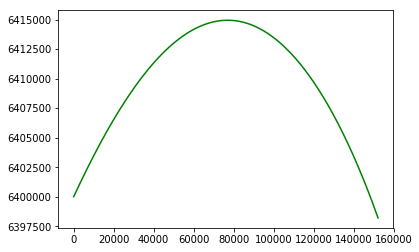

Time of flight: 113.935477398s
Range of flight: 152304.77638m
Maximum: 15415.9299441m
Angle of Collision: 60.30929333 degrees
This is for v0 = 1820


In [40]:
import sys
from math import *
import matplotlib.pyplot as plt


# Gravity, constant acceleration
g     = 9.8

# Default options:
alpha = 0.0
theta = 20 				# (degrees)
v0    = 1500 				# unit: m/s 
R = 6400000
GM = g * R**2
target_range = 152399.38688862484
numerical_range = 0

while abs(target_range - numerical_range)/100 > 1:
    def acc(x, y, vx, vy, t):
        r_temp = sqrt(x**2 + y**2)
        v_abs = math.sqrt(vx**2 + vy**2)

        ax = -GM * x / r_temp**3
        ay = -GM * y / r_temp**3

        beta = 10**-5 * math.exp((-r_temp + R) / (7000))

        return ax - beta*v_abs*vx, ay - beta*v_abs*vy




    def take_a_step(x, y, vx, vy, t, dt):

        ax,ay = acc(x, y, vx, vy, t)

        # Predict: 

        x += vx*dt + 0.5*ax*dt*dt
        y += vy*dt + 0.5*ay*dt*dt
        vx += ax*dt
        vy += ay*dt
        t += dt

        # Correct: 

        ax1,ay1 = acc(x, y, vx, vy, t)

        vx += 0.5*(ax1-ax)*dt
        vy += 0.5*(ay1-ay)*dt

        return x,y,vx,vy,t


    def interp(x0, y0, x1, y1, x):
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)



    # Set parameters governing the numerical details 
    dt = 0.1

    # Set initial position and velocity 
    x0 = 0.0
    y0 = R

    # Determine components of the initial velocity vector 
    vx0 = v0 * cos(theta * pi/180.0)
    vy0 = v0 * sin(theta * pi/180.0)

    # Initialize the trajectory 
    t = 0
    x = x0
    y = y0
    r = sqrt(x**2 + y**2)

    vx = vx0
    vy = vy0

    #print x, y, t
    rmax = 0.0
    x_list = []
    y_list = []
    t_list = []

    while r >= R:

        x_list.append(x)
        y_list.append(y)
        t_list.append(t)

        rprev = sqrt(x**2 + y**2)
        tprev = t
        xprev = x
        yprev = y
        vxprev = vx
        vyprev = vy

        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)

        r = sqrt(x**2 + y**2)

        #print x, y, t
        if r > rmax: rmax = r

    x_range = interp(rprev, xprev, r, x,  R)
    y_range = interp(rprev, yprev, r, y,  R)

    vx_final = interp(rprev, vxprev, r, vx, R)
    vy_final = interp(rprev, vyprev, r, vy, R)

    angle_of_collision = math.tan(vy_final/vx_final)
    angle_of_collision = math.degrees(angle_of_collision) + 90

    rmax -= R
    tof   = interp(rprev, tprev, r, t,  R)
    the_range = atan(x_range/y_range) * R
    numerical_range = the_range
    
    v0 += 1

plt.plot(x_list, y_list, 'g-')
#plt.plot(xcircle, ycircle, 'k-')
plt.show()

# print(alpha, v0, theta)
print('Time of flight: {}s\nRange of flight: {}m\nMaximum: {}m'.format(tof, the_range, rmax))
print('Angle of Collision: {} degrees'.format(angle_of_collision))
print('This is for v0 = {}'.format(v0))

New Range: 152304.77638m

New v0 = 1820

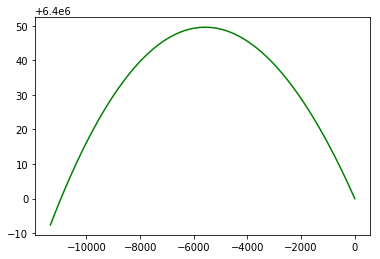

Max Range of flight: 285418.513648 m
This is for theta = 47 degrees


In [49]:
import sys
from math import *
import matplotlib.pyplot as plt


# Gravity, constant acceleration
g     = 9.8

# Default options:
alpha = 0.0
theta = 0 				# (degrees)
v0    = 1820				# unit: m/s 
R = 6400000
GM = g * R**2
max_range = 0
max_theta = 0

while theta < 180:
    def acc(x, y, vx, vy, t):
        r_temp = sqrt(x**2 + y**2)
        v_abs = math.sqrt(vx**2 + vy**2)

        ax = -GM * x / r_temp**3
        ay = -GM * y / r_temp**3

        beta = 10**-5 * math.exp((-r_temp + R) / (7000))

        return ax - beta*v_abs*vx, ay - beta*v_abs*vy




    def take_a_step(x, y, vx, vy, t, dt):

        ax,ay = acc(x, y, vx, vy, t)

        # Predict: 

        x += vx*dt + 0.5*ax*dt*dt
        y += vy*dt + 0.5*ay*dt*dt
        vx += ax*dt
        vy += ay*dt
        t += dt

        # Correct: 

        ax1,ay1 = acc(x, y, vx, vy, t)

        vx += 0.5*(ax1-ax)*dt
        vy += 0.5*(ay1-ay)*dt

        return x,y,vx,vy,t


    def interp(x0, y0, x1, y1, x):
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)



    # Set parameters governing the numerical details 
    dt = 0.1

    # Set initial position and velocity 
    x0 = 0.0
    y0 = R

    # Determine components of the initial velocity vector 
    vx0 = v0 * cos(theta * pi/180.0)
    vy0 = v0 * sin(theta * pi/180.0)

    # Initialize the trajectory 
    t = 0
    x = x0
    y = y0
    r = sqrt(x**2 + y**2)

    vx = vx0
    vy = vy0

    #print x, y, t
    rmax = 0.0
    x_list = []
    y_list = []
    t_list = []

    while r >= R:

        x_list.append(x)
        y_list.append(y)
        t_list.append(t)

        rprev = sqrt(x**2 + y**2)
        tprev = t
        xprev = x
        yprev = y
        vxprev = vx
        vyprev = vy

        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)

        r = sqrt(x**2 + y**2)

        #print x, y, t
        if r > rmax: rmax = r

    x_range = interp(rprev, xprev, r, x,  R)
    y_range = interp(rprev, yprev, r, y,  R)

    vx_final = interp(rprev, vxprev, r, vx, R)
    vy_final = interp(rprev, vyprev, r, vy, R)

    angle_of_collision = math.tan(vy_final/vx_final)
    angle_of_collision = math.degrees(angle_of_collision) + 90

    rmax -= R
    tof   = interp(rprev, tprev, r, t,  R)
    the_range = atan(x_range/y_range) * R
    
    if the_range >= max_range:
        max_range = the_range
        max_theta = theta
    
    theta += 1

plt.plot(x_list, y_list, 'g-')
plt.show()

# print(alpha, v0, theta)
print('Max Range of flight: {} m'.format(max_range))
print('This is for theta = {} degrees'.format(max_theta))